Grupo de trabajo: Alejandro hernández A. - Nicolás Morales Durán.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

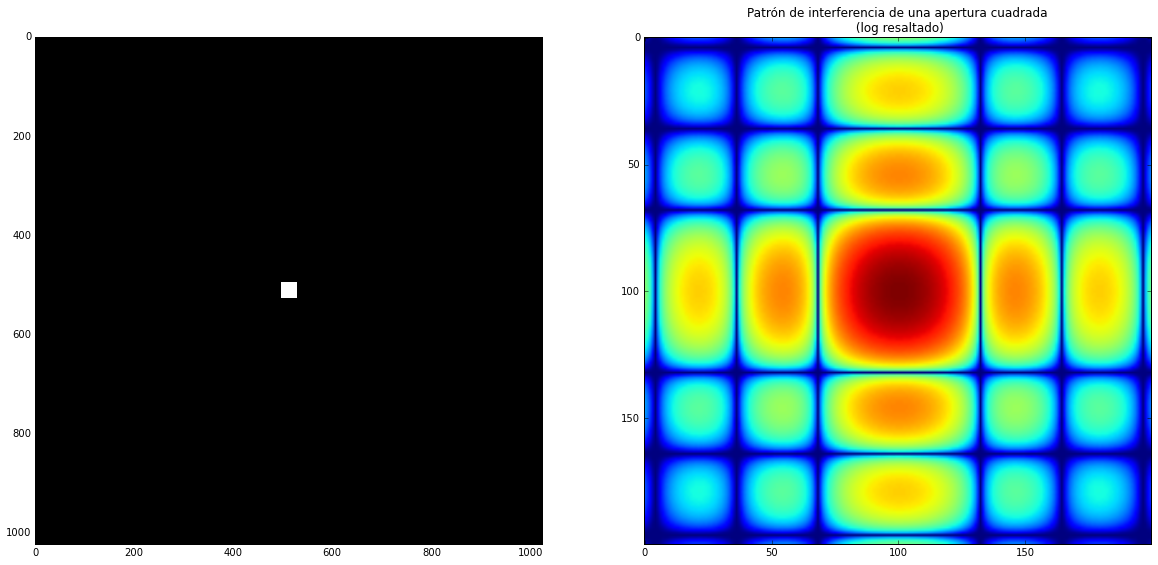

In [2]:
N = 2**10 # Número de puntos de muestreo
a = np.zeros((N,N)) #Generamos el arreglo

# Generamos la rendija cuadrada
a[496:528,496:528] = 1
    
b = np.fft.fft2(a) # Hacemos la Transformada de Fourier Discreta (DFT) teniendo en cuenta que tenemos un array bidimensional.

b = np.fft.fftshift(b) # Aplicamos la función shift al resultado de la DFT.

b = np.abs(b)**2 +1 #Obtenemos el módulo al cuadrado del arreglo anterior.

b = np.log(b+1) # Tomamos el logaritmo del módulo al cuadrado, sumamos 1 por el problema mencionado en el enunciado.

# Obtenemos información acerca de un cuadrado de lado 200 en el arreglo  anterior de acuerdo a lo solicitado en el enunciado.
b = b[412:612,412:612]
        
# Grafico los arreglos obtenidos previamente

plt.figure(figsize=(20,20))        
plt.subplot(1,2,1,aspect='equal')
plt.imshow(a,cmap='Greys_r')
plt.subplot(1,2,2,aspect='equal')
plt.title(u'Patrón de interferencia de una apertura cuadrada \n (log resaltado)')
plt.imshow(b)
plt.show()

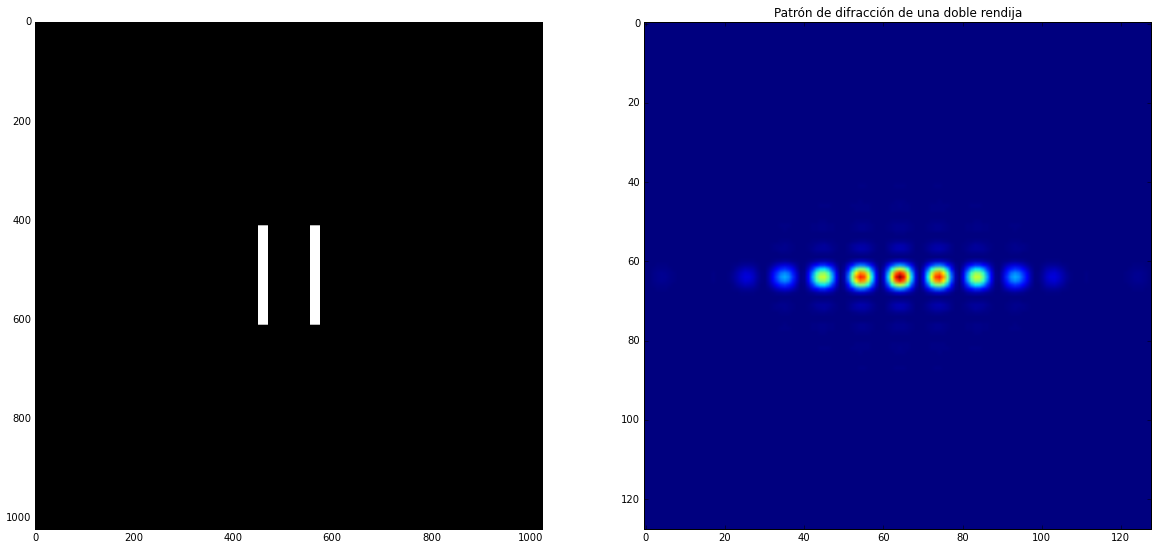

In [4]:
N = 2**10 # Número de puntos de muestreo
a = np.zeros((N,N))#Generamos el arreglo de ceros

# Genero la doble rendija
a[412:612,450:470] = 1
a[412:612,554:574] = 1
    
b = np.fft.fft2(a) # Hacemos la Transformada de Fourier Discreta (DFT) teniendo en cuenta que tenemos una array bidimensional.

b = np.fft.fftshift(b) # Aplicamos la función shift al resultado de la DFT.

b = np.abs(b**2)  # Tomamos el módulo al cuadrado.

# Obtenemos información acerca de un cuadrado de lado 128 en el arreglo  anterior de acuerdo a lo solicitado en el enunciado.
b = b[448:576,448:576]

# Graficamos los arreglos obtenidos previamente

plt.figure(figsize=(20,20))        
plt.subplot(1,2,1,aspect='equal')
plt.imshow(a,cmap='Greys_r')
plt.subplot(1,2,2,aspect='equal')
plt.title(u'Patrón de difracción de una doble rendija')
plt.imshow(b)
plt.show()

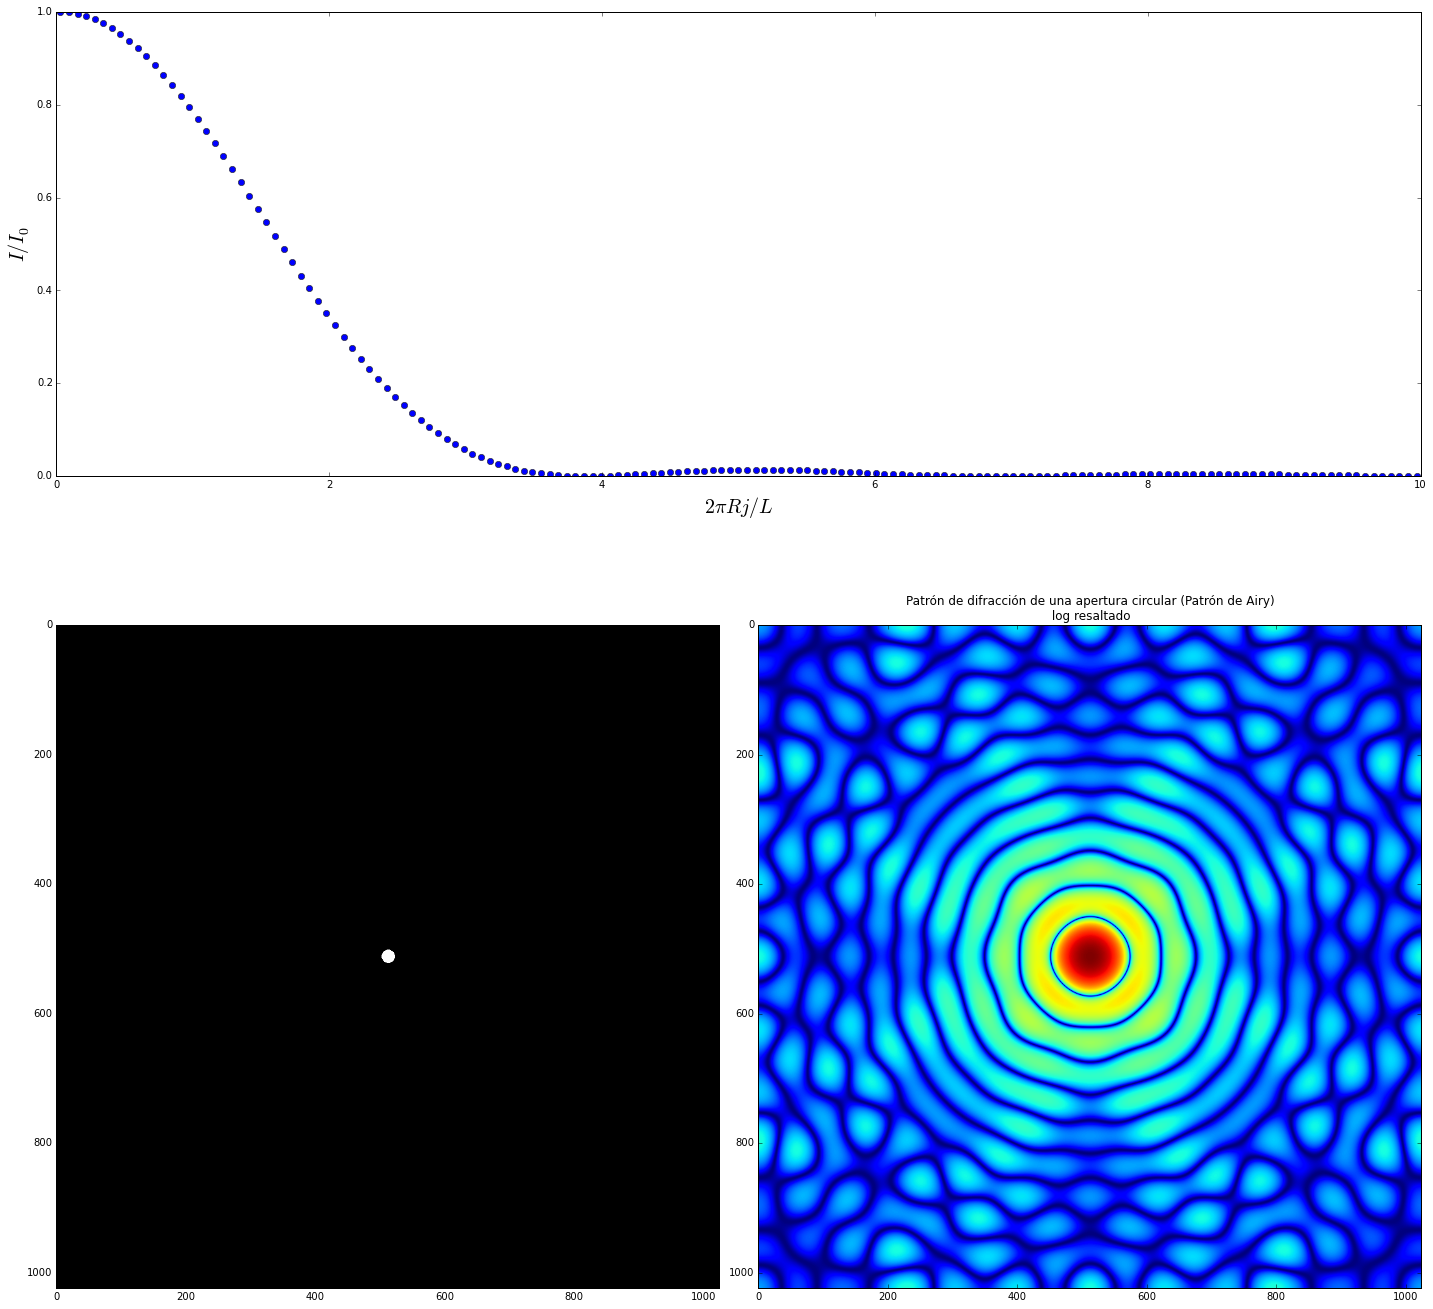

In [7]:
N = 2**10 # Número de puntos de muestreo
radius = 10.24 #Numero de puntos de muestreo
cx, cy = 512., 512. # Definimos el centro del círculo

a = np.array([[(((x-cx)**2+(y-cy)**2) <= radius**2) for x in range(N)] for y in range(N)])



b = np.fft.fft2(a) # Hacemos la Transformada de Fourier Discreta (DFT) teniendo en cuenta que tenemos una array bidimensional.

b = np.fft.fftshift(b) # Aplicamos la función shift al resultado de la DFT.

b = np.abs(b**2) # Tomamos el módulo al cuadrado.

c = np.log(b+1) # Tomamos el logaritmo del módulo al cuadrado y sumamos 1 por el problema mencionado en el enunciado.

# Graficamos los arreglos obtenidos previamente

plt.figure(figsize=(20,20))        
plt.subplot2grid((3,2),(0,0),colspan=2,rowspan=1)
x = 2.*np.pi*radius/1024.*np.linspace(-512,512,1024)
plt.plot(x,b[512]/max(b[512]),'bo')
plt.xlim(0.,10.)
plt.xlabel(r'$2\pi$'+'$Rj/L$',fontsize=20)
plt.ylabel('$I/I_0$',fontsize=20)
plt.subplot2grid((3,2),(1,0),rowspan=2)
plt.imshow(a,cmap='Greys_r')
plt.subplot2grid((3,2),(1,1),rowspan=2)
plt.title(u'Patrón de difracción de una apertura circular (Patrón de Airy) \n log resaltado')
plt.imshow(c)
plt.tight_layout()
plt.show()